In [51]:
import pandas as pd

In [52]:
df = pd.read_csv(r'DigiDB_digimonlist.csv')

In [53]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [54]:
import seaborn as sns

In [55]:
df = df.drop(columns='Number')

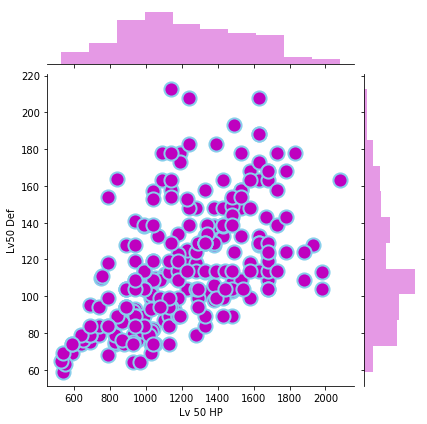

In [56]:
#Do pokemon that have more health have a higher defense 
sns.jointplot(x=df["Lv 50 HP"], y=df["Lv50 Def"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

#Since you see a roughly linear correlation, the answer is yes.

In [57]:
from scipy import stats
import matplotlib.pyplot as plt

In [58]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

In [59]:
x=df["Lv 50 HP"]
y=df["Lv50 Def"]
stats.pearsonr(x, y)#

(0.5613761242981814, 4.454120392297386e-22)

In [ ]:
#Low p value bolsters this argument

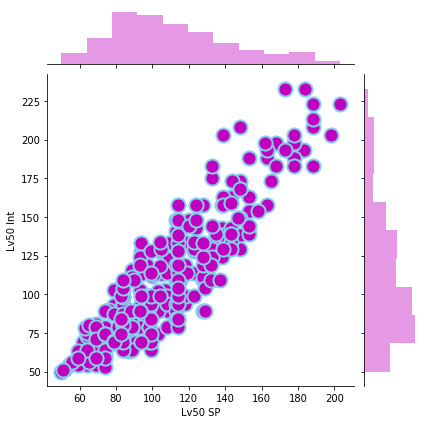

In [22]:
# Are spirit and health correlated? 
sns.jointplot(x=df["Lv50 SP"], y=df["Lv50 Int"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
#not surprisingly, magic users have higher spirit

In [23]:
x=df["Lv50 Int"]
y=df["Lv50 SP"]
stats.pearsonr(x, y)

(0.8956523296996886, 6.89290257837542e-89)

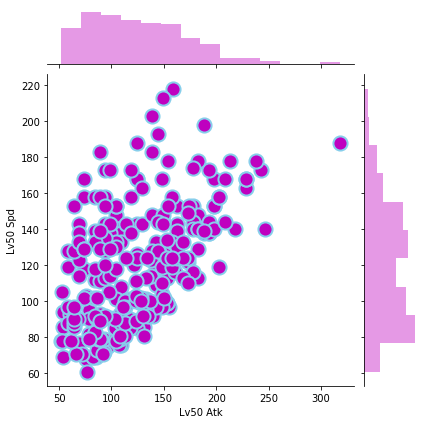

In [24]:
# Are spirit and health correlated? 
sns.jointplot(x=df["Lv50 Atk"], y=df["Lv50 Spd"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
#not surprisingly, magic users have higher spirit

In [ ]:
# correlation isn't as strong. 

In [5]:
cleanup_nums = {"Stage":     {"Ultimate" : 6, "Champion" : 5, "Mega": 4, "Ultra": 5, "Armor" : 3, "Rookie": 2, "In-Training" : 1 , "Baby" : 0},
               "Type" : {"Data" : 0, "Vaccine" : 1, "Virus" : 2, "Free" : 3},
               "Attribute" : { "Plant" : 0, "Wind" : 1, "Light" : 2, "Fire" : 3, "Neutral" : 4, "Dark" : 5, "Earth" : 6, "Plant" : 7, "Electric" : 8, "Water" : 9}}

In [6]:
df.replace(cleanup_nums, inplace=True)

In [7]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,0,3,4,2,0,590,77,79,69,68,95
1,2,Pabumon,0,3,4,2,0,950,62,76,76,69,68
2,3,Punimon,0,3,4,2,0,870,50,97,87,50,75
3,4,Botamon,0,3,4,2,0,690,68,77,95,76,61
4,5,Poyomon,0,3,4,2,0,540,98,54,59,95,86


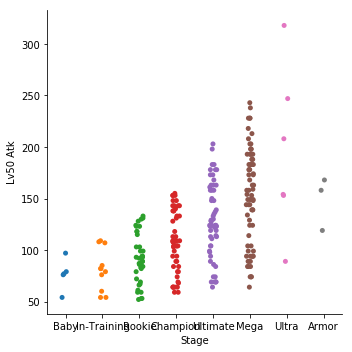

In [26]:
#Are Digimon at higher lvels stronger? (yes)
sns.catplot(x="Stage", y="Lv50 Atk", data=df)

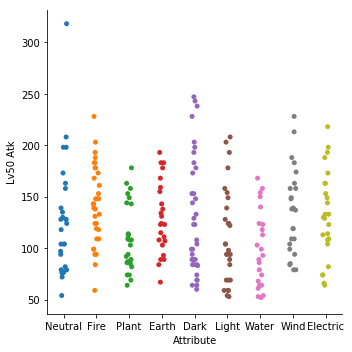

In [31]:
#Is there any difference in how strong each attribute is (no)
sns.catplot(x="Attribute", y="Lv50 Atk", data=df)

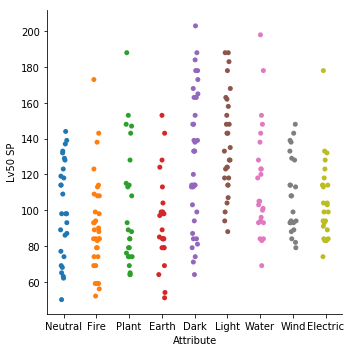

In [33]:
#What category of Digimon are more likely to be magic users? 
sns.catplot(x="Attribute", y="Lv50 SP", data=df)

#based upon this it's light and elemntal type 

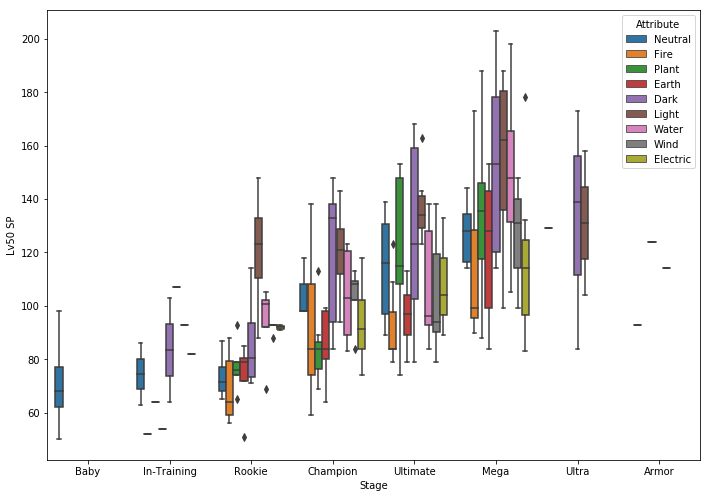

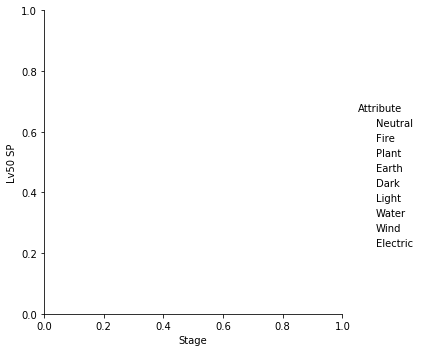

In [40]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Stage", y="Lv50 SP", hue="Attribute", kind="box", data=df, ax=ax)

#Within a category, dark, light and water type digimon tend to have the highest spirit, while fire types tend to have the lowest. 
#This indicates that dark, light and water digimon tend to occupy the magic user niche. 

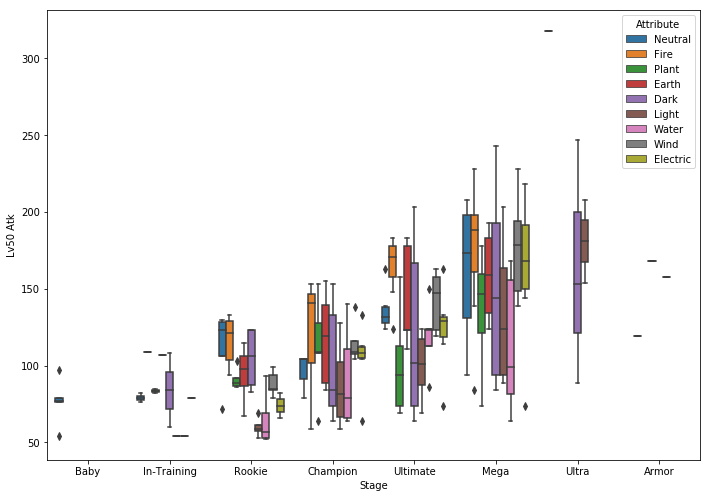

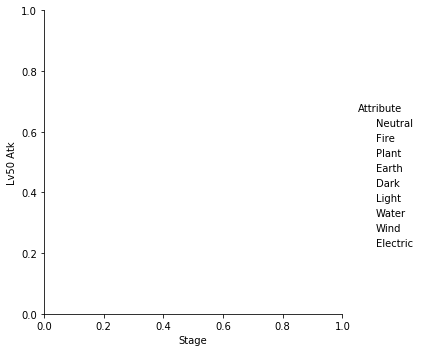

In [41]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Stage", y="Lv50 Atk", hue="Attribute", kind="box", data=df, ax=ax)

#Conversely, just by looking at attacking power, 
#fire types tend to have the highest score across all stages of Digimon evolution, 
#indicating that fire types tend to occupy the attacker niche. 

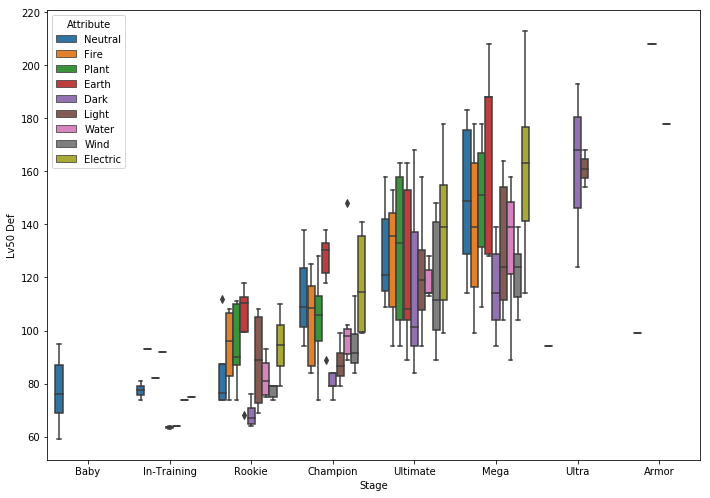

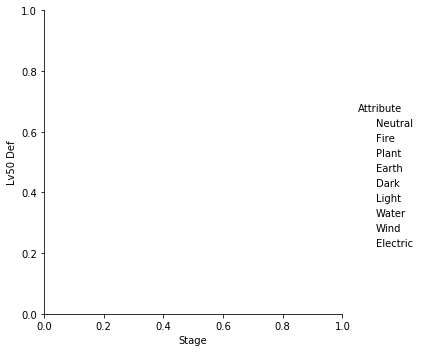

In [42]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Stage", y="Lv50 Def", hue="Attribute", kind="box", data=df, ax=ax)

#Finally, earth-based digimon tend to have the highest defense across every stage of evolution, 
#indicating that these occupy the "defender" niche.

In [ ]:
mega = df()Attribute

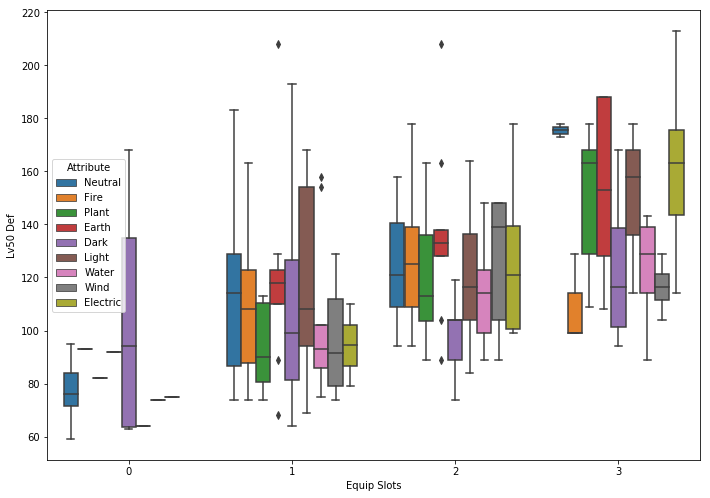

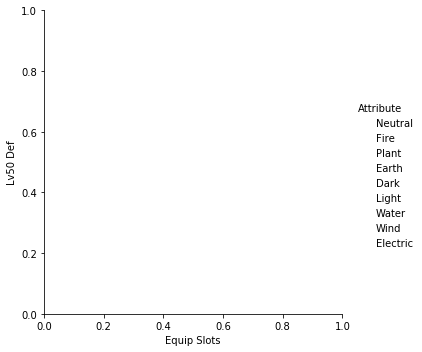

In [45]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Equip Slots", y="Lv50 Def", hue="Attribute", kind="box", data=df, ax=ax)

In [46]:
df = pd.read_csv(r'DigiDB_movelist.csv')

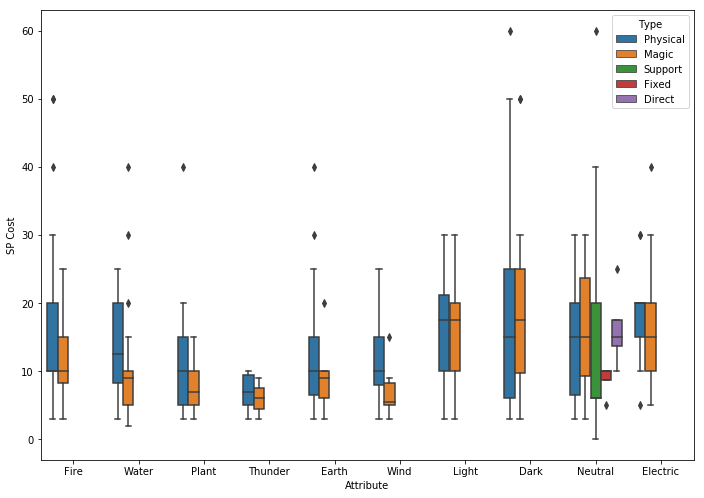

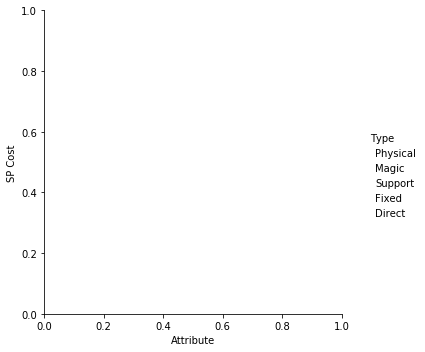

In [47]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Attribute", y="SP Cost", hue="Type", kind="box", data=df, ax=ax)

#surprisingly no, magic moves do not actually cost more than physical moves (the  opposite effect is seen )
#then why do magic users have higher spirit? 

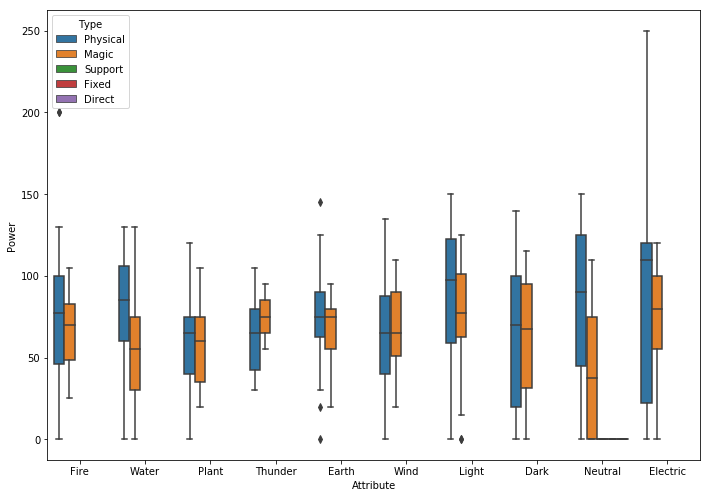

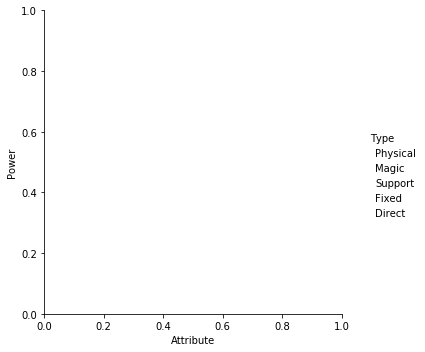

In [48]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="Attribute", y="Power", hue="Type", kind="box", data=df, ax=ax)

#Magic moves tend to be significantly weaker for fire, water, and neutral Digimon.
#The effect is smaller for light and dark  digimon. 

In [49]:
#IF this is true, than this would predict that digimon that are primarily magic users would be faster than attackers



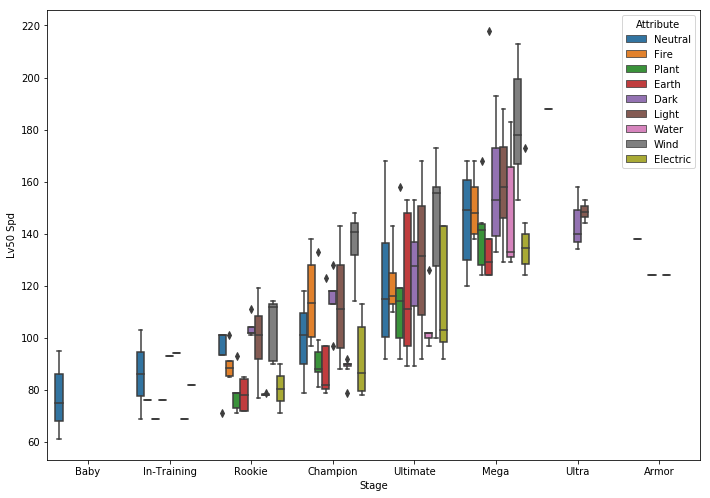

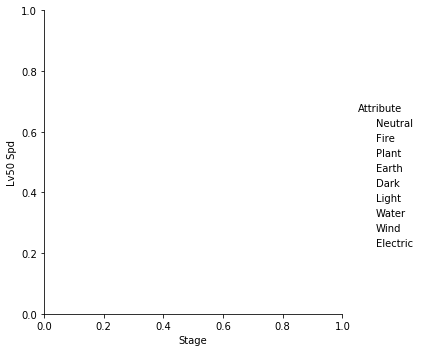

In [60]:
#Conclusions: Niche picking in Digimon is primirily driven by the strength of certain attacks, rather than the cost of certain attacks. 